In [1]:
# pip install -r requirements.txt

# setting up the notebook width to 100% of the screen
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd

# you can change this to larger number, I kept a small value for good aspect ratio for book figures
pd.set_option('display.max_columns', 10)

In [3]:
df = pd.read_csv("./phishing_dataset.csv")

In [4]:
df.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,...,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,...,1,1,-1,1,1
1,2,3,1,3,144,...,1,1,1,1,1
2,3,3,1,2,58,...,-1,1,-1,0,1
3,4,3,1,6,79,...,1,1,1,-1,1
4,5,3,0,4,46,...,-1,0,-1,-1,1
5,6,3,1,1,42,...,1,1,-1,1,1
6,7,2,0,5,60,...,1,1,-1,-1,1
7,8,1,0,3,30,...,1,1,1,1,1
8,9,8,7,2,76,...,1,1,1,-1,1
9,10,2,0,2,46,...,1,1,-1,-1,1


In [5]:
df.describe(include="all") 

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,...,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,...,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,...,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,...,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,...,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [7]:
binary_features = [col for col in df if df[col].dropna().value_counts().index.isin([0,1]).all() and col != "CLASS_LABEL"]

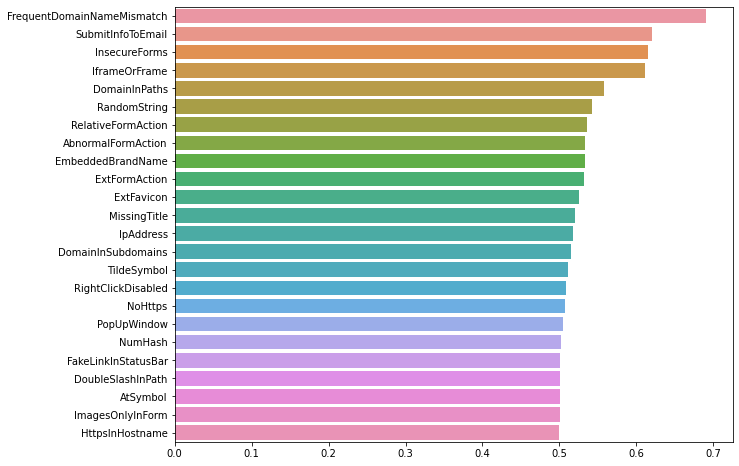

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))

accuracies = []
for i in binary_features: 
    accuracy = sum(df.CLASS_LABEL == df[i]) / len(df) 
    accuracies.append((i, max(accuracy, 1-accuracy)))
accuracies = sorted(accuracies, key=lambda c: c[1], reverse=True)
sns.barplot( x=[c[1] for c in accuracies], y=[c[0] for c in accuracies]);

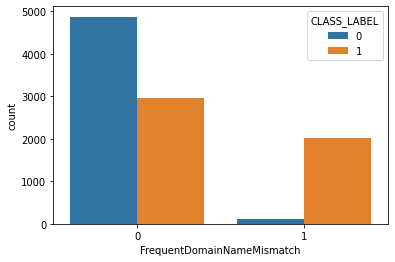

In [9]:
sns.countplot(data=df, x="FrequentDomainNameMismatch", hue="CLASS_LABEL"); 

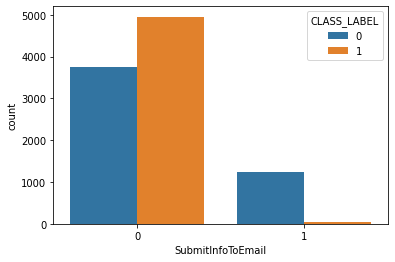

In [10]:
sns.countplot(data=df, x="SubmitInfoToEmail", hue="CLASS_LABEL"); 

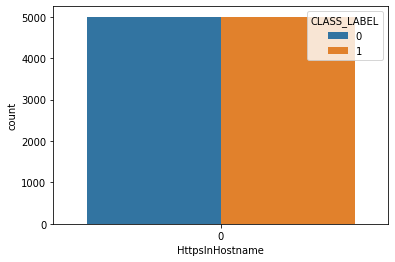

In [11]:
sns.countplot(data=df, x="HttpsInHostname", hue="CLASS_LABEL"); 

In [12]:
numerical_features = [col for col in df.columns if col not in (["id", "CLASS_LABEL"] + binary_features)]

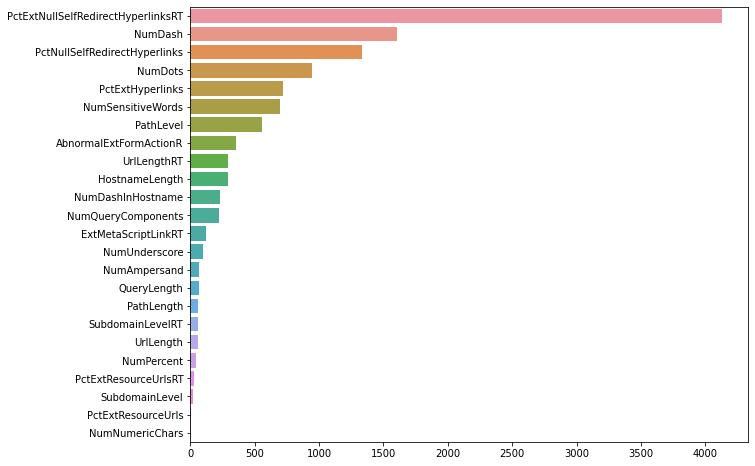

In [26]:
from sklearn.feature_selection import f_classif
plt.figure(figsize=(10,8))

fs = SelectKBest(score_func=f_classif)
fs.fit(df[numerical_features], df.CLASS_LABEL)

scores = zip(numerical_features, fs.scores_)
scores = sorted(scores, key=lambda c: c[1], reverse=True)

sns.barplot( x=[c[1] for c in scores], y=[c[0] for c in scores]);

In [59]:
df.PctExtNullSelfRedirectHyperlinksRT.fillna("NONE").unique()

array([ 1,  0, -1])

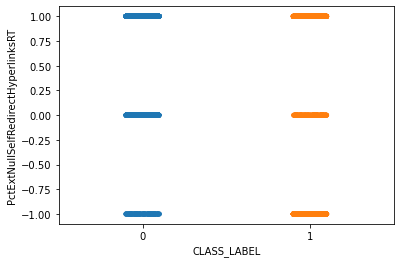

In [32]:
sns.stripplot(data=df, x="CLASS_LABEL", y="PctExtNullSelfRedirectHyperlinksRT");

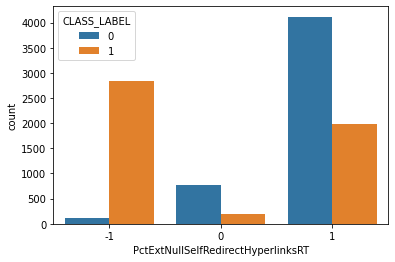

In [33]:
sns.countplot(data=df, x="PctExtNullSelfRedirectHyperlinksRT", hue="CLASS_LABEL"); 

In [60]:
df.NumDash.fillna("NONE").unique()

array([ 0,  1,  2,  3, 11,  4,  5,  7,  6, 13,  8, 20, 15,  9, 12, 10, 17,
       16, 14, 26, 24, 19, 18, 55, 23])

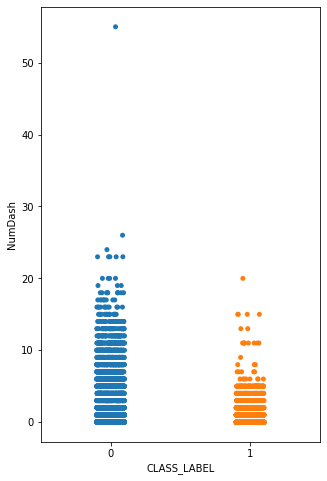

In [61]:
plt.figure(figsize=(5, 8))
sns.stripplot(data=df, x="CLASS_LABEL", y="NumDash");

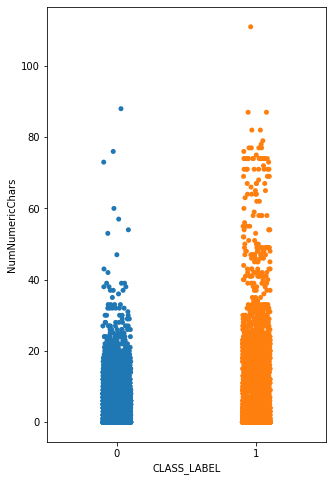

In [62]:
plt.figure(figsize=(5, 8))
sns.stripplot(data=df, x="CLASS_LABEL", y="NumNumericChars");

In [65]:
df["rule_1"] = (df.FrequentDomainNameMismatch==1)*1.
rule_1_accuracy = (df["rule_1"] == df["CLASS_LABEL"]).mean()
print(rule_1_accuracy)

0.6907


In [67]:
df["rule_2"] = (df. SubmitInfoToEmail==0)*1. 
rule_2_accuracy = (df["rule_2"] == df["CLASS_LABEL"]).mean() 
print(rule_2_accuracy) 

0.6198


In [75]:
df["rule_1_or_rule_2"] = ((df.rule_1==1) | (df.rule_2==1))*1.
rule_1_or_rule_2_accuracy = (df["rule_1_or_rule_2"] == df["CLASS_LABEL"]).mean() 
df["rule_1_and_rule_2"] = ((df.rule_1==1) & (df.rule_2==1))*1.
rule_1_and_rule_2_accuracy = (df["rule_1_and_rule_2"] == df["CLASS_LABEL"]).mean() 
print(rule_1_or_rule_2_accuracy, rule_1_and_rule_2_accuracy) 

0.6182 0.6923


In [76]:
df["rule_a"] = (df.PctExtNullSelfRedirectHyperlinksRT < 0)*1.
rule_a_accuracy = (df["rule_a"] == df["CLASS_LABEL"]).mean()
print(rule_a_accuracy)

0.7717


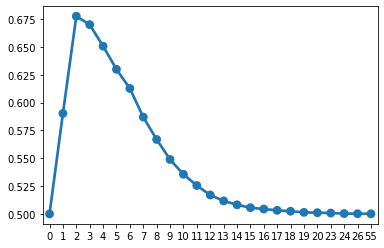

In [86]:
possible_values = sorted(df.NumDash.fillna("NONE").unique())
accuracies_numdash=[]
for v in possible_values:
    tmp_rule_b = (df.NumDash < v)*1.
    rule_b_accuracy = (tmp_rule_b == df["CLASS_LABEL"]).mean()
    accuracies_numdash.append((str(v), rule_b_accuracy))
sns.pointplot(x=[c[0] for c in accuracies_numdash], y=[c[1] for c in accuracies_numdash]);

In [87]:
df["rule_b"] = (df.NumDash < 2)*1.
rule_b_accuracy = (df["rule_b"] == df["CLASS_LABEL"]).mean()
print(rule_b_accuracy)

0.6776


In [89]:
df["rule_a_or_rule_b"] = ((df.rule_a==1) | (df.rule_b==1))*1.
rule_a_or_rule_b_accuracy = (df["rule_a_or_rule_b"] == df["CLASS_LABEL"]).mean() 
df["rule_a_and_rule_b"] = ((df.rule_a==1) & (df.rule_b==1))*1.
rule_a_and_rule_b_accuracy = (df["rule_a_and_rule_b"] == df["CLASS_LABEL"]).mean() 
print(rule_a_or_rule_b_accuracy, rule_a_and_rule_b_accuracy) 

0.6974 0.7519


In [90]:
df["rule_a_or_rule_1"] = ((df.rule_a==1) | (df.rule_1==1))*1.
rule_a_or_rule_1_accuracy = (df["rule_a_or_rule_1"] == df["CLASS_LABEL"]).mean() 
df["rule_a_and_rule_1"] = ((df.rule_a==1) & (df.rule_1==1))*1.
rule_a_and_rule_1_accuracy = (df["rule_a_and_rule_1"] == df["CLASS_LABEL"]).mean() 
print(rule_a_or_rule_1_accuracy, rule_a_and_rule_1_accuracy) 

0.8086 0.6538


In [91]:
df["rule_a_or_rule_1_and_rule_2"] = ((df.rule_a==1) | (df.rule_1_and_rule_2==1))*1.
rule_a_or_rule_1_and_rule_2_accuracy = (df["rule_a_or_rule_1_and_rule_2"] == df["CLASS_LABEL"]).mean() 
df["rule_a_and_rule_1_and_rule_2"] = ((df.rule_a==1) & (df.rule_1_and_rule_2==1))*1.
rule_a_and_rule_1_and_rule_2_accuracy = (df["rule_a_and_rule_1_and_rule_2"] == df["CLASS_LABEL"]).mean() 
print(rule_a_or_rule_1_and_rule_2_accuracy, rule_a_and_rule_1_and_rule_2_accuracy) 

0.8092 0.6548
